# Projects -Optimizing Retail Banking Strategies Through RFM-Based Customer Segmentation

## 06 – KMeans Clustering and Elbow Method

In this step, we use unsupervised machine learning to identify natural customer segments using the **KMeans clustering algorithm**.

### 📌 Objectives
- Normalize the RFM features
- Use the **Elbow method** to choose the optimal number of clusters
- Apply **KMeans** to segment customers
- Visualize clusters and interpret the segment profiles

### 🔑 Input Data
- `R_score`, `F_score`, `M_score` (or Weighted RFM Score)

### 📈 Output
- Customer segmentation via cluster labels
- Visual plots to understand cluster differences

**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

**Import dataset**

In [5]:
rfm = pd.read_csv('outputs/rfm_table2.csv', index_col=0)

rfm.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,RFM_group,Segments,Weighted_rfm_score,Weighted_segments
0,0,C1010011,26,2,5106.0,4,4,4,12,444,high,16,high
1,1,C1010012,69,1,1499.0,2,1,3,6,213,medium,8,medium
2,2,C1010014,76,2,1455.0,1,4,3,8,143,medium,9,medium
3,3,C1010018,37,1,30.0,4,1,1,6,411,medium,10,high
4,4,C1010024,65,1,5000.0,2,1,4,7,214,medium,9,medium


**Create a dataframe for clustering alogrithm**

In [7]:
rfm = rfm.drop(['RFM_group', 'Segments', 'Weighted_rfm_score', 'Weighted_segments', 'Unnamed: 0'], axis = 1)
# Supprimer toutes les colonnes Unnamed automatiquement
rfm = rfm.loc[:, ~rfm.columns.str.contains('^Unnamed')]

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,C1010011,26,2,5106.0,4,4,4,12
1,C1010012,69,1,1499.0,2,1,3,6
2,C1010014,76,2,1455.0,1,4,3,8
3,C1010018,37,1,30.0,4,1,1,6
4,C1010024,65,1,5000.0,2,1,4,7


In [9]:
rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_score', 'F_score',
       'M_score', 'RFM_score'],
      dtype='object')

**Scale dataframe**

In [11]:
scaler = StandardScaler()

In [13]:
# We start to select numeric columns for scaler
rfm_features = rfm[['Recency', 'Frequency', 'Monetary', 'R_score', 'F_score', 'M_score', 'RFM_score']]

# We scale our dataframe
scaled_data = scaler.fit_transform(rfm_features)

In [15]:
scaled_data

array([[-1.99039095,  1.8173276 ,  0.45193522, ...,  1.34164068,
         1.34164068,  2.07526598],
       [ 0.83352617, -0.41084172, -0.04969314, ..., -1.34163967,
         0.4472139 , -0.70451286],
       [ 1.2932336 ,  1.8173276 , -0.05581225, ...,  1.34164068,
         0.4472139 ,  0.22208009],
       ...,
       [ 0.5708362 , -0.41084172, -0.24063734, ...,  1.34164068,
        -1.34163967, -0.24121639],
       [-0.08588871, -0.41084172, -0.25120672, ...,  1.34164068,
        -1.34163967,  0.22208009],
       [-1.92471846, -0.41084172, -0.13925473, ...,  1.34164068,
         0.4472139 ,  1.61196951]])

**Implement clustering algorithm**

In [17]:
model = KMeans(random_state = 1)

**Using the distortion metric**

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=1),
                 k=(2, 10))

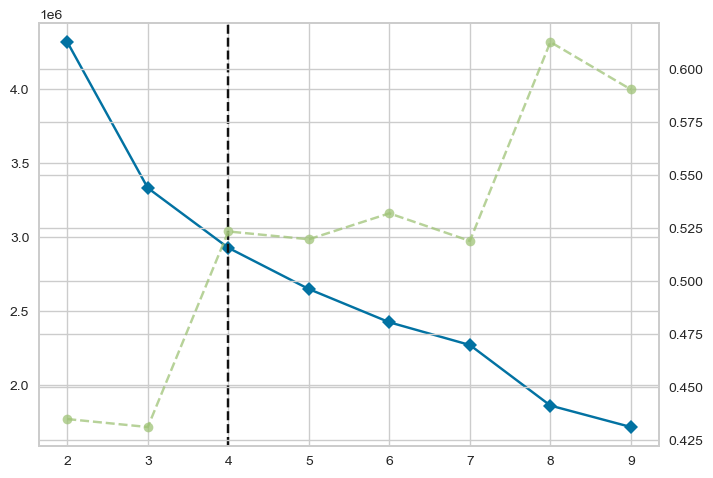

In [25]:
plot_model = KElbowVisualizer(model, k = (2,10), metric = "distortion", timing = False)
plot_model.fit(scaled_data)

**Using calinski - harabasz metric**

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=1),
                 k=(2, 10), metric='calinski_harabasz')

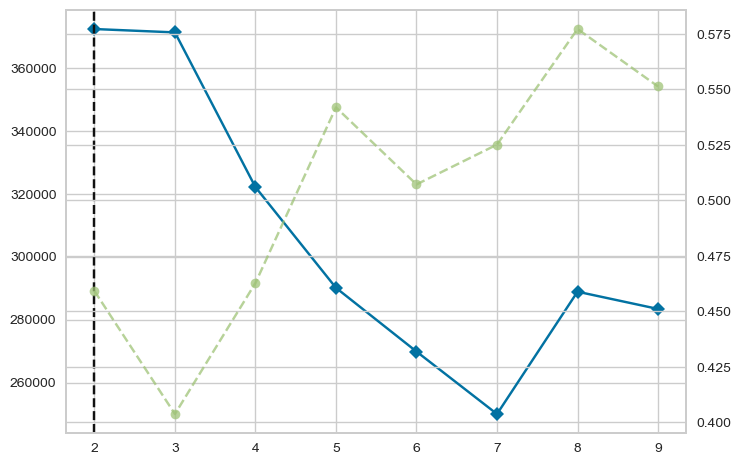

In [23]:
plot_model_2 = KElbowVisualizer(model, k = (2,10), metric = "calinski_harabasz", timing = False)
plot_model_2.fit(scaled_data)

**Cluster assignment**

In [27]:
final_model = KMeans(random_state = 1, n_clusters = 4)
final_model.fit(scaled_data)

KMeans(n_clusters=4, random_state=1)

In [29]:
cluster_assignment = final_model.labels_
cluster_assignment

array([2, 1, 2, ..., 1, 0, 3], dtype=int32)

In [31]:
# We will create a new column Cluster in our dataframe
rfm['Cluster'] = cluster_assignment

In [33]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Cluster
0,C1010011,26,2,5106.0,4,4,4,12,2
1,C1010012,69,1,1499.0,2,1,3,6,1
2,C1010014,76,2,1455.0,1,4,3,8,2
3,C1010018,37,1,30.0,4,1,1,6,0
4,C1010024,65,1,5000.0,2,1,4,7,1
...,...,...,...,...,...,...,...,...,...
878758,C9099836,76,1,691.0,1,4,3,8,1
878759,C9099877,37,1,222.0,4,4,2,10,3
878760,C9099919,65,1,126.0,2,4,1,7,1
878761,C9099941,55,1,50.0,3,4,1,8,0


**Visualize cluster**

<Axes: xlabel='Recency', ylabel='Monetary'>

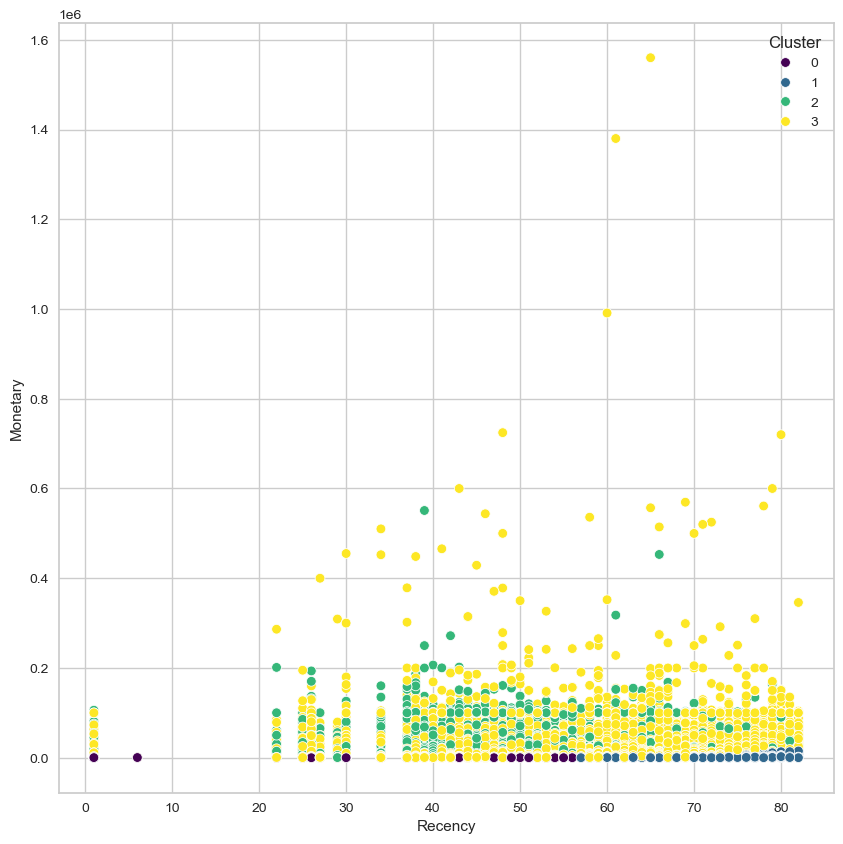

In [35]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = rfm, x = rfm['Recency'], y = rfm['Monetary'], hue = rfm['Cluster'], palette = 'viridis')

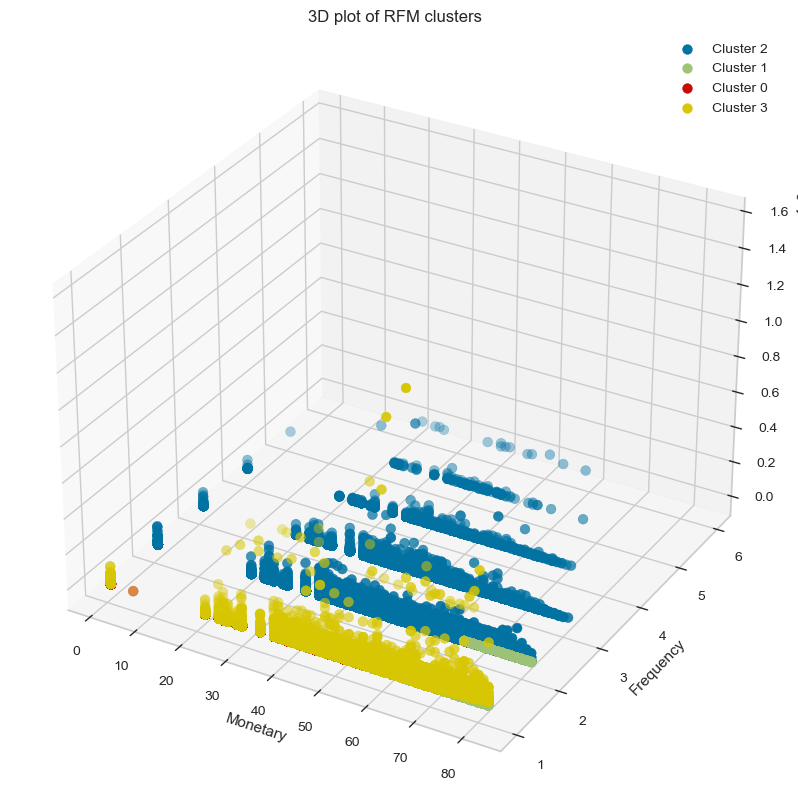

In [37]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = "3d")

color = ['b', 'g', 'r', 'y']
for cluster, color in zip(rfm['Cluster'].unique(), color):
    cluster_data = rfm[rfm['Cluster'] ==  cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], c = color, s = 50, marker = 'o', label = f"Cluster {cluster}")

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_xlabel('Monetary')

ax.legend()
plt.title('3D plot of RFM clusters')
plt.show()

/var/folders/gt/5gl4sh3x46g22_mfwmdtqdfw0000gn/T/ipykernel_7554/3539762680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = rfm['Cluster'], palette = 'viridis')


<Axes: xlabel='Cluster', ylabel='count'>

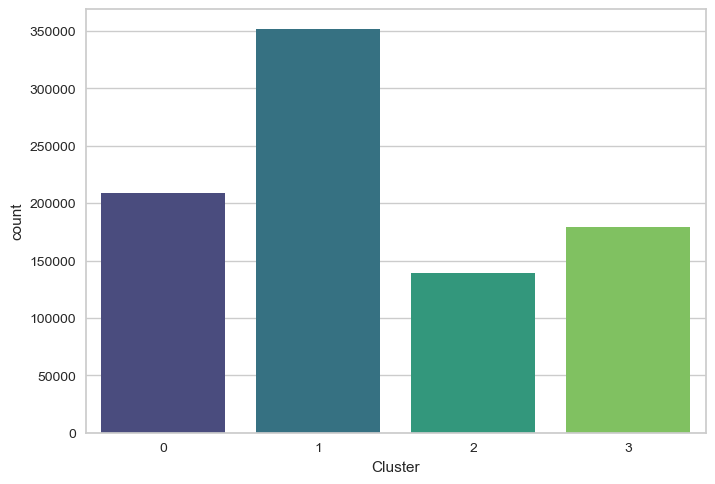

In [39]:
# What cluster is populated
sns.countplot(x = rfm['Cluster'], palette = 'viridis')

In [41]:
# Descriptive statistics for each cluster
for cluster in rfm['Cluster'].unique():
    print(f"Cluster: {cluster}")
    print(rfm[rfm['Cluster'] == cluster].describe())

Cluster: 2
             Recency      Frequency       Monetary        R_score   F_score  \
count  139511.000000  139511.000000  139511.000000  139511.000000  139511.0   
mean       48.194608       2.145200    3362.990431       3.109891       4.0   
std        12.890233       0.393915    8197.745352       0.915591       0.0   
min         1.000000       2.000000       2.000000       1.000000       4.0   
25%        40.000000       2.000000     680.000000       2.000000       4.0   
50%        47.000000       2.000000    1450.000000       3.000000       4.0   
75%        57.000000       2.000000    3071.850000       4.000000       4.0   
max        82.000000       6.000000  550972.340000       4.000000       4.0   

             M_score      RFM_score   Cluster  
count  139511.000000  139511.000000  139511.0  
mean        3.260911      10.370802       2.0  
std         0.855677       1.222513       0.0  
min         1.000000       6.000000       2.0  
25%         3.000000      10.000000  

In [43]:
cluster_0 = rfm[rfm['Cluster'] == 0]
cluster_1 = rfm[rfm['Cluster'] == 1]
cluster_2 = rfm[rfm['Cluster'] == 2]
cluster_3 = rfm[rfm['Cluster'] == 3]

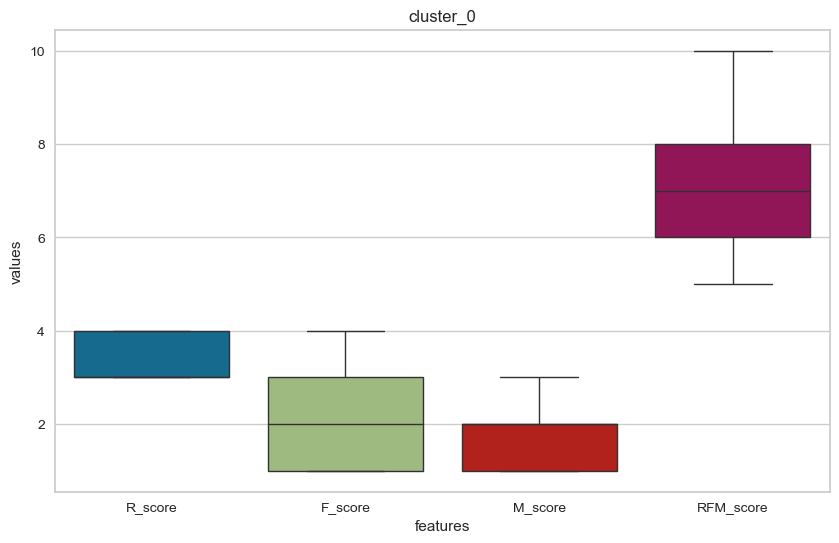

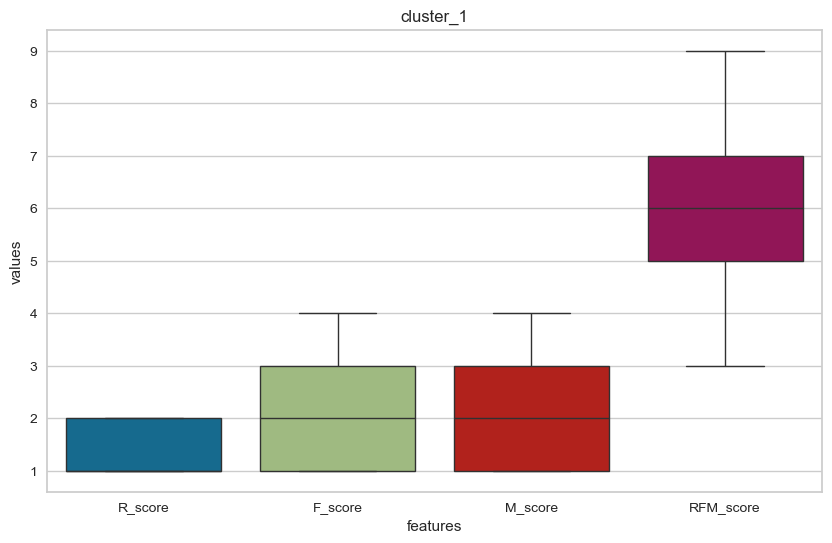

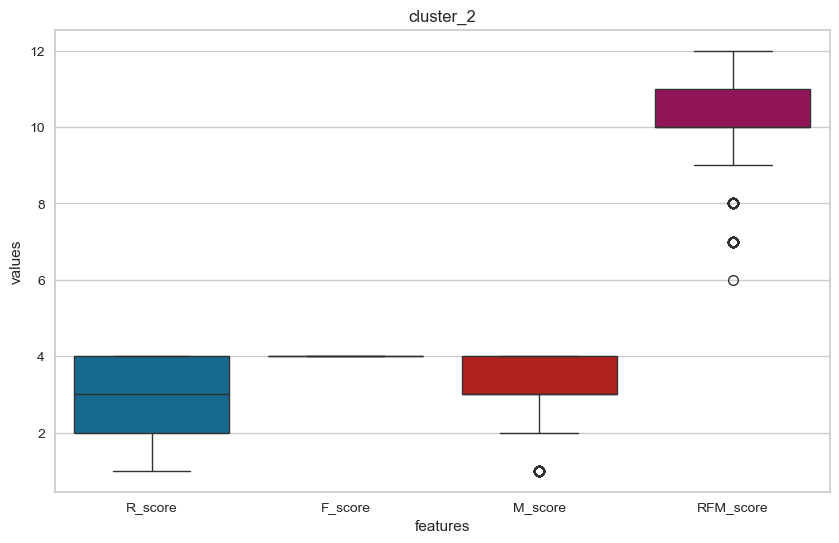

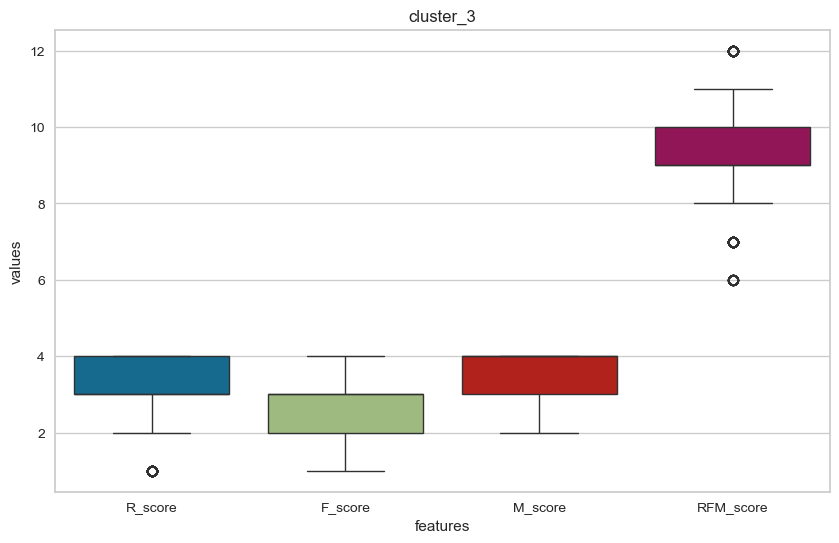

In [45]:
plt.figure(figsize = (10,6))
sns.boxplot(data = cluster_0[['R_score','F_score','M_score','RFM_score']])
plt.title(f"cluster_0")
plt.ylabel('values')
plt.xlabel('features')
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(data = cluster_1[['R_score','F_score','M_score','RFM_score']])
plt.title(f"cluster_1")
plt.ylabel('values')
plt.xlabel('features')
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(data = cluster_2[['R_score','F_score','M_score','RFM_score']])
plt.title(f"cluster_2")
plt.ylabel('values')
plt.xlabel('features')
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(data = cluster_3[['R_score','F_score','M_score','RFM_score']])
plt.title(f"cluster_3")
plt.ylabel('values')
plt.xlabel('features')
plt.show()

## 07 – Cluster Profiling and Business Interpretation

Now that each customer has been assigned to a cluster, we will analyze the characteristics of each group to understand:

- What defines each cluster?
- How do they differ in terms of Recency, Frequency, and Monetary value?
- What business actions can be taken for each segment?

### 📌 Objectives
- Calculate average RFM values per cluster
- Visualize cluster profiles (bar plots, boxplots)
- Assign business labels based on behavior

**1. Group by Cluster and Calculate Metrics**

In [47]:
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2)
cluster_profile['Count'] = rfm['Cluster'].value_counts().sort_index()
cluster_profile

,Recency,Frequency,Monetary,Count
Cluster,,,,
0,43.96,1.00,288.88,208551
1,70.72,1.01,958.55,351307
2,48.19,2.15,3362.99,139511
3,48.76,1.00,4264.94,179394


**2. Visualize profiles by cluster**

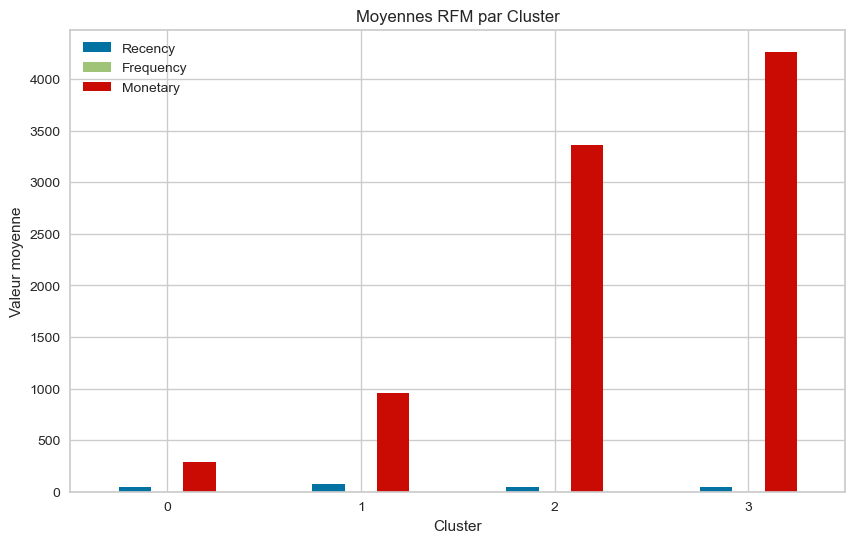

In [49]:
#Barplot comparative

cluster_profile[['Recency', 'Frequency', 'Monetary']].plot(kind='bar', figsize=(10, 6))
plt.title('Moyennes RFM par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valeur moyenne')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

/var/folders/gt/5gl4sh3x46g22_mfwmdtqdfw0000gn/T/ipykernel_7554/528290688.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='Cluster', y='Recency', ax=axes[0], palette='Set2')
/var/folders/gt/5gl4sh3x46g22_mfwmdtqdfw0000gn/T/ipykernel_7554/528290688.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='Cluster', y='Frequency', ax=axes[1], palette='Set2')
/var/folders/gt/5gl4sh3x46g22_mfwmdtqdfw0000gn/T/ipykernel_7554/528290688.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='Cluster', y='Monetary', a

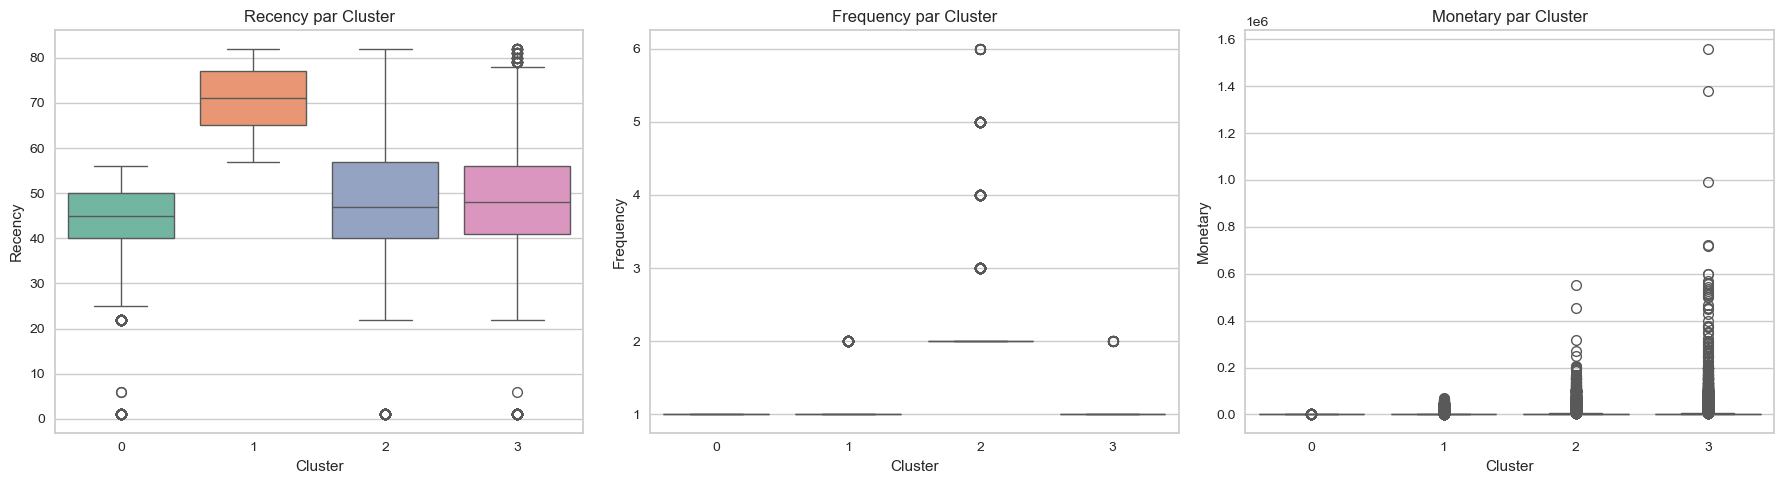

In [51]:
# Boxplots for each dimension

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=rfm, x='Cluster', y='Recency', ax=axes[0], palette='Set2')
axes[0].set_title('Recency par Cluster')

sns.boxplot(data=rfm, x='Cluster', y='Frequency', ax=axes[1], palette='Set2')
axes[1].set_title('Frequency par Cluster')

sns.boxplot(data=rfm, x='Cluster', y='Monetary', ax=axes[2], palette='Set2')
axes[2].set_title('Monetary par Cluster')

plt.tight_layout()
plt.show()

**3. Business labels**

In [53]:
def label_segment(cluster_id):
    if cluster_id == 0:
        return 'VIP'
    elif cluster_id == 1:
        return 'Loyal'
    elif cluster_id == 2:
        return 'At Risk'
    else:
        return 'Low Value'

rfm['Cluster_label'] = rfm['Cluster'].apply(label_segment)

In [55]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Cluster,Cluster_label
0,C1010011,26,2,5106.0,4,4,4,12,2,At Risk
1,C1010012,69,1,1499.0,2,1,3,6,1,Loyal
2,C1010014,76,2,1455.0,1,4,3,8,2,At Risk
3,C1010018,37,1,30.0,4,1,1,6,0,VIP
4,C1010024,65,1,5000.0,2,1,4,7,1,Loyal
...,...,...,...,...,...,...,...,...,...,...
878758,C9099836,76,1,691.0,1,4,3,8,1,Loyal
878759,C9099877,37,1,222.0,4,4,2,10,3,Low Value
878760,C9099919,65,1,126.0,2,4,1,7,1,Loyal
878761,C9099941,55,1,50.0,3,4,1,8,0,VIP


In [59]:
rfm.to_csv('outputs/rfm_final.csv')